### NAME: GERARD PAUL C IRAO



# LEARNING Q-LEARNING USING A MAZE PROBLEM

#### CREATING AND VISUALZING THE GRAPH

In [1]:
# MAZE PROBLEM 
# MAKE A INITIAL MAZE PROBLEM (4x4)
#  # 1 2 3 4
#  # # # # # # 
#1 #       G #
#2 #   W     #
#3 #   W     #
#4 # S       #
   # # # # # #
# S - start
# G - end 
# W - wall/blocked path 
# nothing - open area

# Number of states - 16 for each blok
# Number of possible actions - 16 
num_states = 16
num_actions = 16

# LOCATION OF EVERY PART OF THE MAZE
matrix_loc = [
  ["R1C1","R1C2","R1C3","R1C4"],
  ["R2C1","R2C2","R2C3","R2C4"],
  ["R3C1","R3C2","R3C3","R3C4"],
  ["R4C1","R4C2","R4C3","R4C4"]
]

## USING Q-LEARNING TO SOLVE THE MAZE PROBLEM

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Q-learning parameters

# Initialize parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate 
num_episodes = 1000 # Number of Episodes

# -----------Q-Learning algorithm-----------
# Initializing Q-Values and start value
# Initializing Q-Values
Q = np.zeros([num_states, num_actions])
cuml_sum = []  # array of cumulative sum per episode
# initializing the start and goal in matrix
start_location = "R4C1"
end_location = "R1C4"

# Maps indices to locations
location_to_state = {
    'R1C1' : 0,
    'R1C2' : 1,
    'R1C3' : 2,
    'R1C4' : 3,
    'R2C1' : 4,
    'R2C2' : 5,
    'R2C3' : 6,
    'R2C4' : 7,
    'R3C1' : 8,
    'R3C2' : 9,
    'R3C3' : 10,
    'R3C4' : 11,
    'R4C1' : 12,
    'R4C2' : 13,
    'R4C3' : 14,
    'R4C4' : 15,
}
state_to_location = dict((state,location) for location,state in location_to_state.items()) # for getting route path

# REWARD MAP FOR THE MATRIX MAZE
reward_matrix = np.array([
  [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]
])

# Copy the rewards matrix to new Matrix
rewards_new = np.copy(reward_matrix)
# Get the ending state corresponding to the ending location as given
ending_state = location_to_state[end_location]
# With the above information automatically set the priority of the given ending state to the highest one
rewards_new[ending_state,ending_state] = 999

# Q-Learning process
for i in range(num_episodes):

    # Pick up a state randomly
    current_state = np.random.randint(0,num_states) # Python excludes the upper bound

    # For traversing through the neighbor locations in the maze
    playable_actions = []

    # Iterate through the new rewards matrix and get the actions > 0
    for j in range(num_actions):
        if rewards_new[current_state,j] > 0:
            playable_actions.append(j)

    # Pick an action randomly from the list of playable actions leading us to the next state
    next_state = np.random.choice(playable_actions)

    # Compute the temporal difference
    # The action here exactly refers to going to the next state
    TD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state,next_state]

    # Update the Q-Value using the Bellman equation
    Q[current_state,next_state] += alpha * TD

    # calculating sum per episode
    iandjsum = 0 # temporary variable to calculate cumulative sum per episode
    for i in range(num_states):
        j = np.argmax(Q[i,])
        iandjsum += Q[i,j]
    cuml_sum.append(iandjsum)


# Initialize the optimal route with the starting location
route = [start_location]
# We do not know about the next location yet, so initialize with the value of starting location
next_location = start_location

# We don't know about the exact number of iterations needed to reach to the final location hence while loop will be a good choice for iteratiing
while(next_location != end_location):
    # Fetch the starting state
    starting_state = location_to_state[start_location]
    # Fetch the highest Q-value pertaining to starting state
    next_state = np.argmax(Q[starting_state,])
    # We got the index of the next state. But we need the corresponding letter. 
    next_location = state_to_location[next_state]
    route.append(next_location)
    # Update the starting location for the next iteration
    start_location = next_location
    

print("ROUTE:",route)
print("Matrix Locations:",end="")
matrix_loc

ROUTE: ['R4C1', 'R4C2', 'R4C3', 'R3C3', 'R3C4', 'R2C4', 'R1C4']
Matrix Locations:

[['R1C1', 'R1C2', 'R1C3', 'R1C4'],
 ['R2C1', 'R2C2', 'R2C3', 'R2C4'],
 ['R3C1', 'R3C2', 'R3C3', 'R3C4'],
 ['R4C1', 'R4C2', 'R4C3', 'R4C4']]

##  plot showing the agent's cumulative rewards over episodes.

Text(0, 0.5, 'Cumulative rewards')

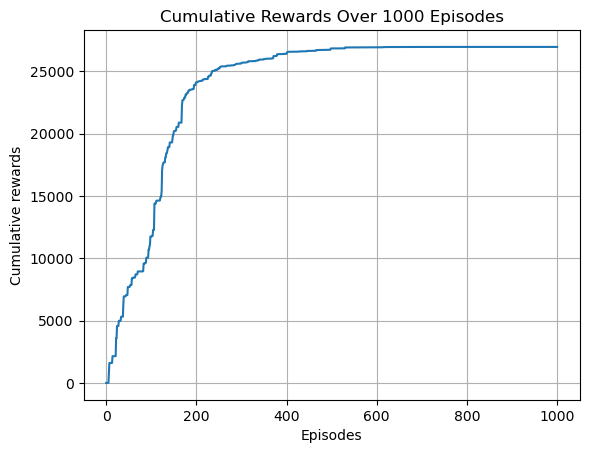

In [3]:
x = [i for i in range(0,1001)]
y = cuml_sum


# PREVENT ADDING MORE ZERO INCASE OF USER ERROR
if (y[0] != 0):
    y.insert(0,0)


# Plot
plt.plot(x,y)
plt.grid('on')

plt.title("Cumulative Rewards Over 1000 Episodes")
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")

## Visualizing the Q-values for different states and actions using a heatmap

Text(183.22222222222223, 0.5, 'Current State')

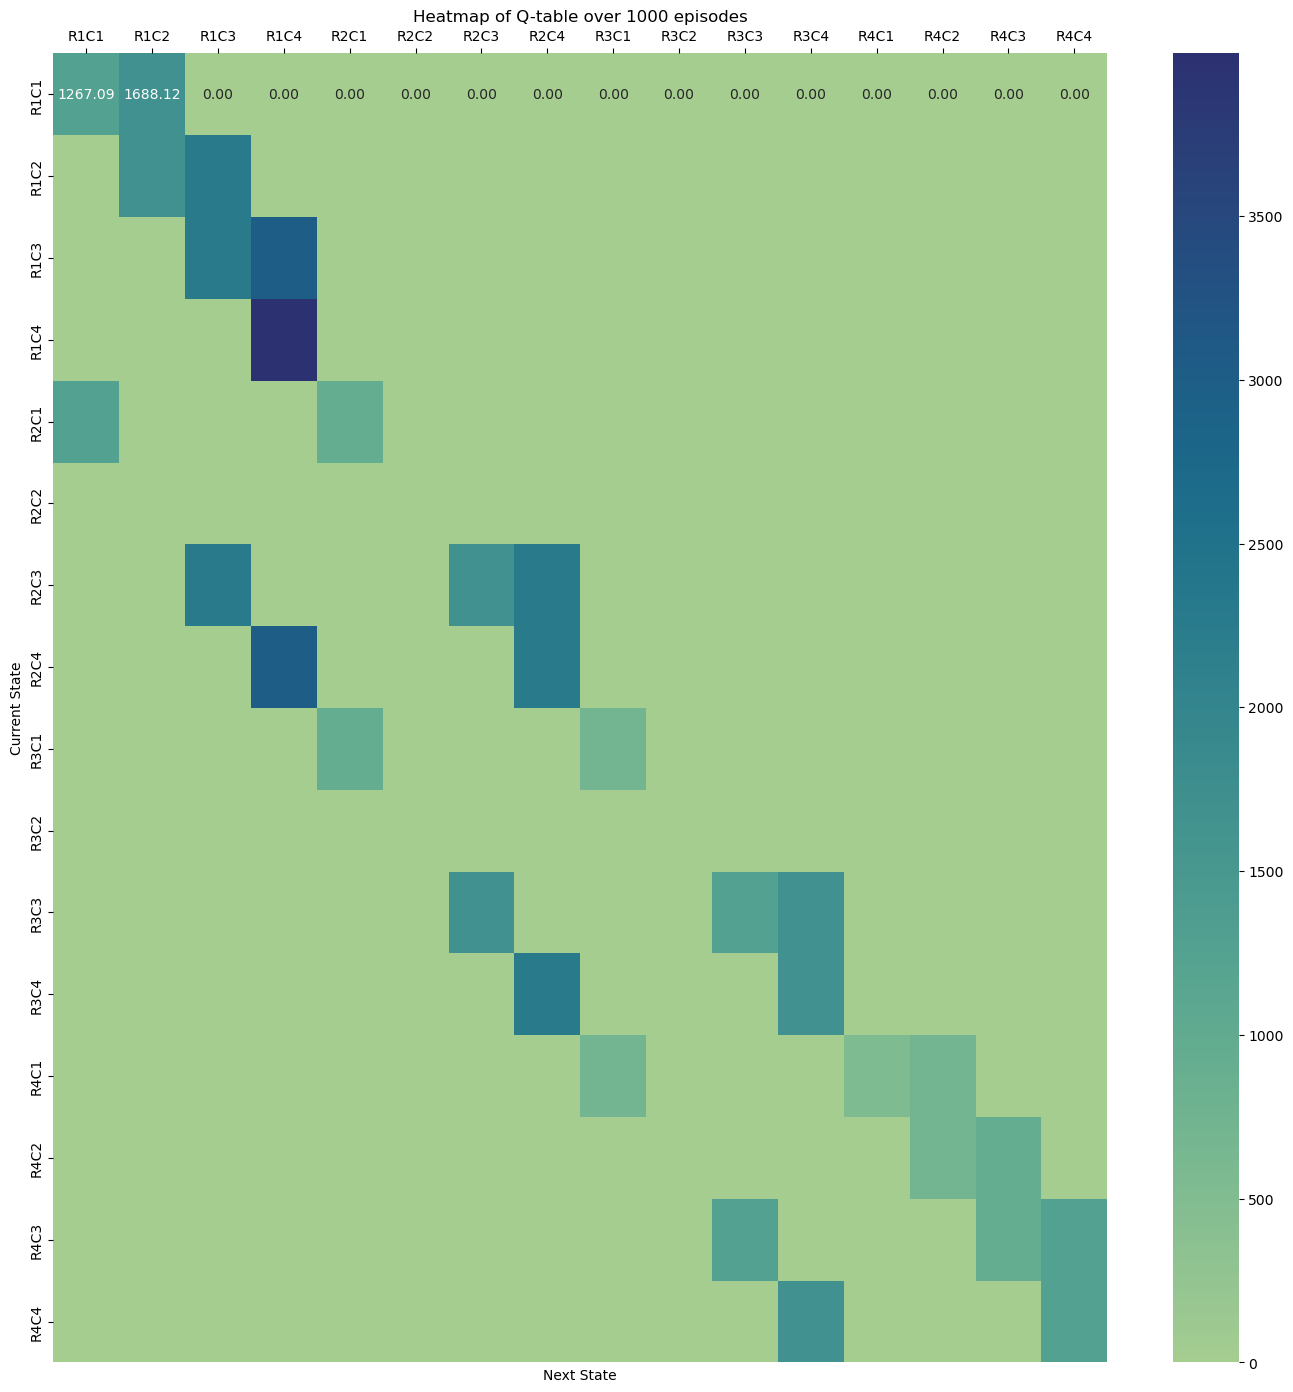

In [4]:
import seaborn as sns

# CREATE HEATMAP
ax = plt.figure(figsize=(17,17))
ax = sns.heatmap(Q,annot= True,fmt= ".2f",xticklabels=list(location_to_state.keys()),yticklabels=list(location_to_state.keys()),cmap="crest")

# LABEL HEATMAP
ax.xaxis.tick_top()
plt.title("Heatmap of Q-table over 1000 episodes")
plt.xlabel("Next State")
plt.ylabel("Current State")

##### VISUALIZING THE AGENT MOVEMENT IN THE ROUTE DIAGRAM BY DIAGRAM

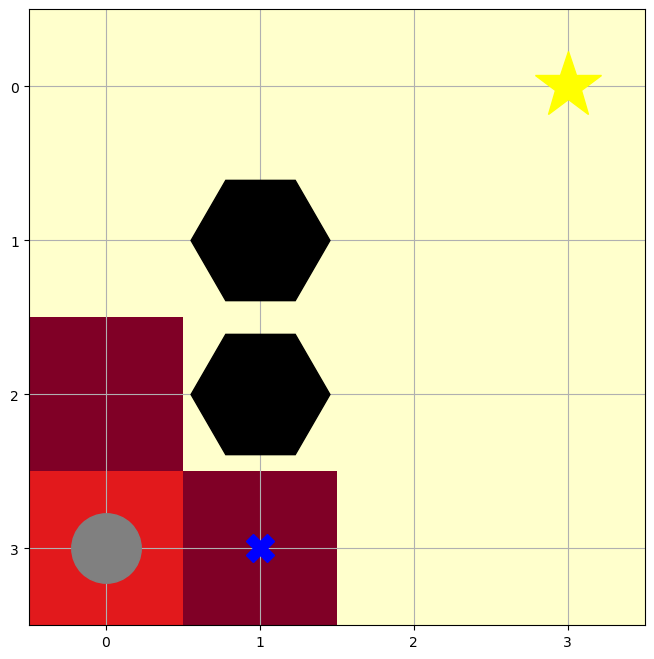

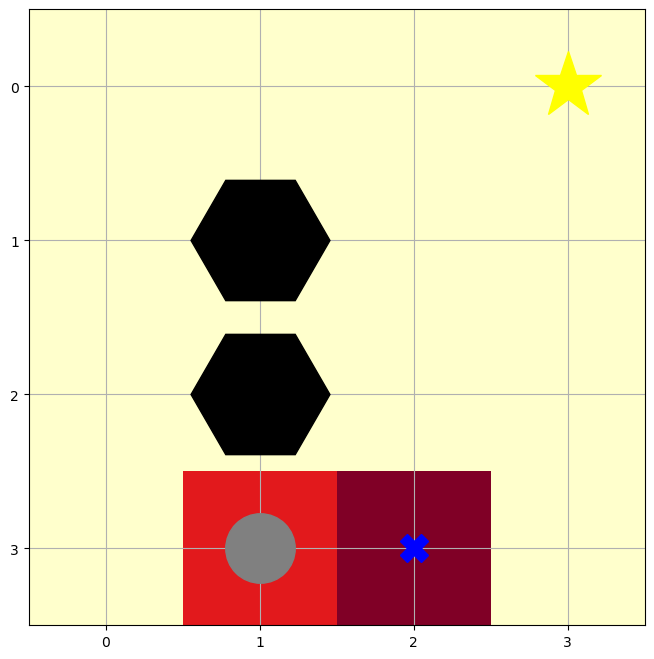

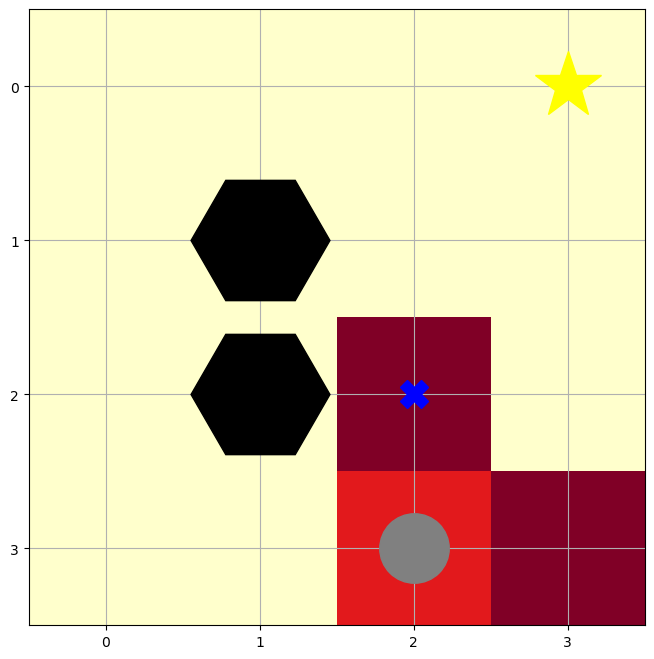

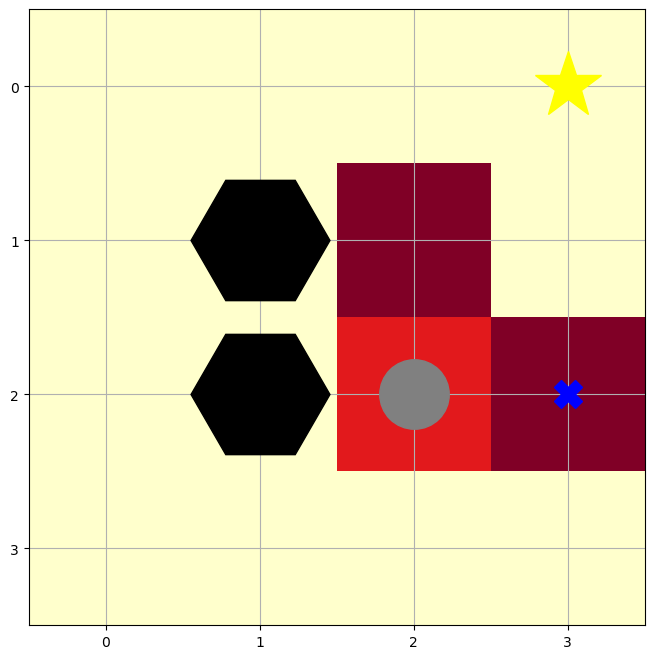

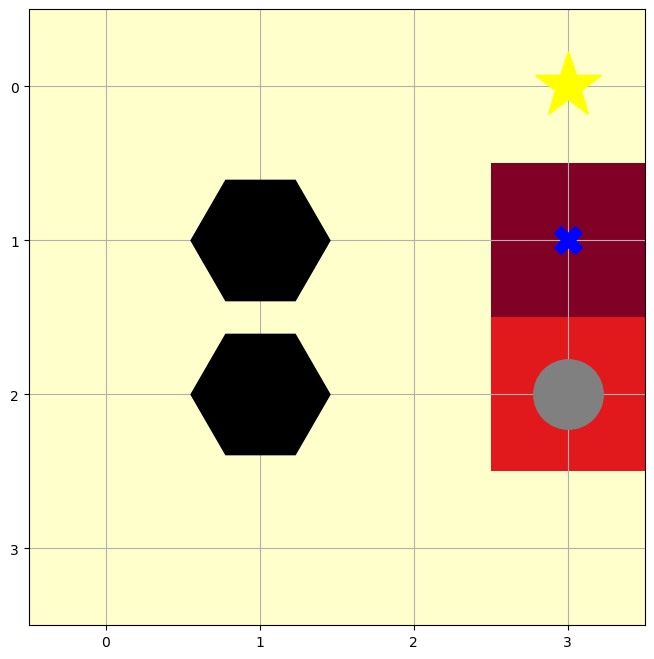

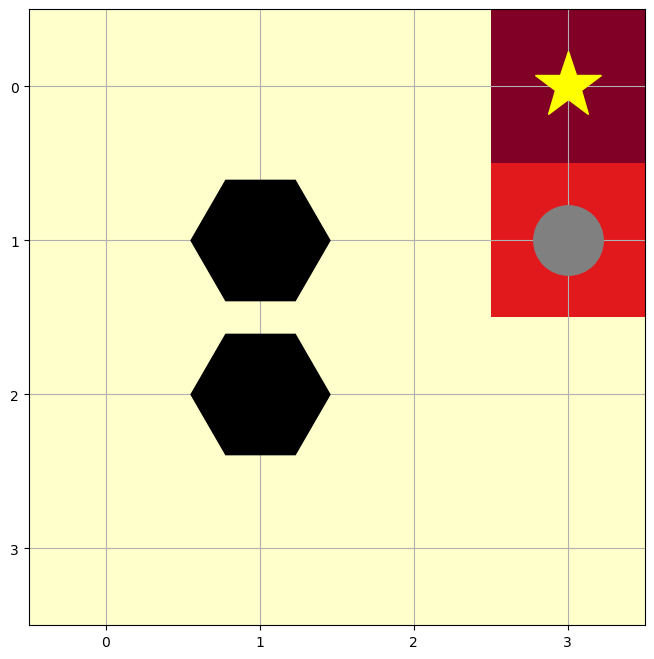

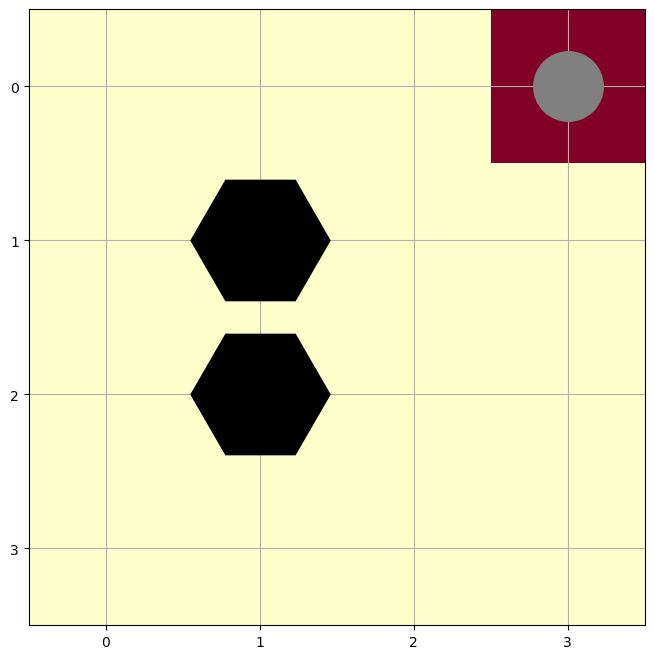

In [5]:
# create dict of location values based on the graph 
location_to_graph = {
    'R1C1' : [0,0],
    'R1C2' : [1,0],
    'R1C3' : [2,0],
    'R1C4' : [3,0],
    'R2C1' : [0,1],
    'R2C2' : [1,1],
    'R2C3' : [2,1],
    'R2C4' : [3,1],
    'R3C1' : [0,2],
    'R3C2' : [1,2],
    'R3C3' : [2,2],
    'R3C4' : [3,2],
    'R4C1' : [0,3],
    'R4C2' : [1,3],
    'R4C3' : [2,3],
    'R4C4' : [3,3],
}


# creating array of location of the graph and respective routes
path = []
for i in route:
    path.append([location_to_graph[i],i])


#PLOTTING ENVIRONMENT AND DECISION MATRIX
for i,j in path:
    # THE DECISION HEAT MAP MATRIX OF THE AGENT PER ROUTE
    Q_val_heat_map_loc = []
    j_index = location_to_state[j]
    for k in range(16):
        Q_val_heat_map_loc.append(Q[j_index,k])
    Q_val_heat_map_loc = np.array(Q_val_heat_map_loc).reshape((4,4))
    
    # PLOT ENVIRONMENT
    fig, ax = plt.subplots(figsize = (8,8))
    heatmap = ax.imshow(Q_val_heat_map_loc,cmap="YlOrRd")
    heatmap = plt.xticks(np.arange(0,4,1))
    heatmap = plt.yticks(np.arange(0,4,1))
    
    # ENVIRONMENT VARIABLES
    heatmap = plt.plot(1,2,marker = 'H', color = "black",markersize= 100)
    heatmap = plt.plot(1,1,marker = 'H', color = "black",markersize= 100)
    heatmap = plt.plot(3,0,marker = '*', color = "yellow",markersize= 50)
    heatmap = plt.grid("on")
    
    # PLOT AGENT DECISION AND CHOSEN DESTINATION
    heatmap = plt.plot(location_to_graph[j][0],location_to_graph[j][1],marker = 'o', color = "grey",markersize= 50)
    if (i[0]+1 < 4):
        if (Q_val_heat_map_loc[i[1]][i[0]+1] < Q_val_heat_map_loc[i[1]-1][i[0]]):
           heatmap = plt.plot(i[0],i[1]-1,marker = "X",color = "blue", markersize = 20)
        else:  
            heatmap = plt.plot(i[0]+1,i[1],marker = "X",color = "blue", markersize = 20)
    else:
        if (i[1]-1 > 0):
             heatmap = plt.plot(i[0],i[1]-1,marker = "X",color = "blue", markersize = 20)
        else:
            heatmap = plt.plot([],[])
    plt.show()
    


# LEGEND
# GREY CIRCLE = AGENT
# LIGHT RED BOX= CURRENT LOCATION
# DARK RED BOX = POSSIBLE LOCATIONS FOR THE AGENT TO MOVE
# BLUE X = CHOSEN AGENT LOCATION
# BLACK HEXAGON = MAZE BLOCKS
# STAR = GOAL

## ANIMATION OF THE AGENT INTERACTION WITH THE MAZE ENVIRONMENT

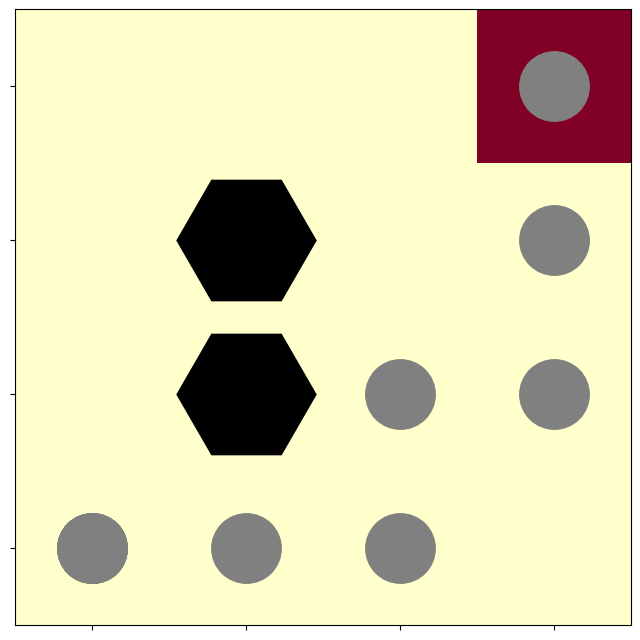

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



location_to_graph = {
    'R1C1' : [0,0],
    'R1C2' : [1,0],
    'R1C3' : [2,0],
    'R1C4' : [3,0],
    'R2C1' : [0,1],
    'R2C2' : [1,1],
    'R2C3' : [2,1],
    'R2C4' : [3,1],
    'R3C1' : [0,2],
    'R3C2' : [1,2],
    'R3C3' : [2,2],
    'R3C4' : [3,2],
    'R4C1' : [0,3],
    'R4C2' : [1,3],
    'R4C3' : [2,3],
    'R4C4' : [3,3],
}



path = []
path_animation = [] # added this state for animation 
for i in route:
    path_animation.append(location_to_state[i])
    path.append([location_to_graph[i],i])



# SET UP INITIAL ENVIRONMENT
fig, ax = plt.subplots(figsize = (8,8))
data = np.zeros((4,4))
heatmap = ax.imshow(data, cmap='YlOrRd', origin='upper')
heatmap = plt.xticks(np.arange(0,4,1))
heatmap = plt.yticks(np.arange(0,4,1))
heatmap =ax.set_xticklabels([])
heatmap = ax.set_yticklabels([])
heatmap = plt.plot(1,2,marker = 'H', color = "black",markersize= 100)
heatmap = plt.plot(1,1,marker = 'H', color = "black",markersize= 100)
heatmap = plt.plot(3,0,marker = '*', color = "yellow",markersize= 50)
heatmap = plt.plot([],[],marker = 'o', color = "grey",markersize= 50)


# GET AGENT STEPS AND TURN IT INTO FRAMES
frames = len(path_animation)


# UPDATE PER FRAME
def update(frame):

    # TURN IT FROM LOOP BASED TO FUNCTION BASED CODE BLOCK
    j = state_to_location[path_animation[frame]]
    Q_val_heat_map_loc = []
    j_index = location_to_state[j]
    for k in range(16):
        Q_val_heat_map_loc.append(Q[j_index,k])
    Q_val_heat_map_loc = np.array(Q_val_heat_map_loc).reshape((4,4))
    
    
    # PLOT UPDATED ENVIRONMENT
    heatmap = ax.imshow(Q_val_heat_map_loc,cmap="YlOrRd")
    heatmap = plt.xticks(np.arange(0,4,1))
    heatmap = plt.yticks(np.arange(0,4,1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # PLOT AGENT DECISION AND CHOSEN DESTINATION
    heatmap = plt.plot(location_to_graph[j][0],location_to_graph[j][1],marker = 'o', color = "grey",markersize= 50)
    if (path[frame][0][0]+1 < 4):
        if (Q_val_heat_map_loc[path[frame][0][1]][path[frame][0][0]+1] < Q_val_heat_map_loc[path[frame][0][1]-1][path[frame][0][0]]):
           heatmap = plt.plot(path[frame][0][0],path[frame][0][1]-1,marker = "X",color = "blue", markersize = 20)
        else:  
            heatmap = plt.plot(path[frame][0][0]+1,path[frame][0][1],marker = "X",color = "blue", markersize = 20)
    else:
        if (path[frame][0][1]-1 > 0):
            heatmap = plt.plot(path[frame][0][0],path[frame][0][1]-1,marker = "X",color = "blue", markersize = 20)
        else:
            heatmap = plt.plot([],[])
    return heatmap
    
# ANIMATING THE AGENT ACTIONS AND ENVIRONEMNT
ani = FuncAnimation(fig, update, frames= frames, blit=True)

HTML(ani.to_jshtml())



# LEGEND
# GREY CIRCLE = AGENT
# LIGHT RED BOX= CURRENT LOCATION
# DARK RED BOX = POSSIBLE LOCATIONS FOR THE AGENT TO MOVE
# BLUE X = CHOSEN AGENT LOCATION
# BLACK HEXAGON = MAZE BLOCKS
# STAR = GOAL



# LINKS:

CHATGPT FOR COMPLEX QUESTIONS: https://openai.com/gpt-4



<br>Q-LEARNING MATH ALGORITHM LEARNING SITES:</br>
<br>https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187</br>
<br>https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/</br>
<br>https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial</br>
<br>https://towardsdatascience.com/maze-rl-d035f9ccdc63</br>

<br>Q-LEARNING CODE ALGORITHM LEARNING SITES:</br>
<br>https://www.samyzaf.com/ML/rl/qmaze.html</br>
<br>https://github.com/erikdelange/Reinforcement-Learning-Maze</br>
<br>https://blog.floydhub.com/an-introduction-to-q-learning-reinforcement-learning/</br>
